In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572) 
  
# data (as pandas dataframes) 
X = taiwanese_bankruptcy_prediction.data.features 
y = taiwanese_bankruptcy_prediction.data.targets 
  
# metadata 
# print(taiwanese_bankruptcy_prediction.metadata) 
  
# variable information 
# print(taiwanese_bankruptcy_prediction.variables) 

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor, BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge, ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import precision_score, accuracy_score, f1_score, mean_squared_error, mean_absolute_error
from tqdm import tqdm
import os
os.chdir("D://meridianthe4//PML//Cases//Glass_Identification")

In [3]:
y.value_counts(normalize=True)*100

Bankrupt?
0            96.77372
1             3.22628
Name: proportion, dtype: float64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

In [6]:
features = [2, 3, 4, 5]
n_est = [25, 50, 100, 150, 200]
scores = []
for f in tqdm(features):
    for n in n_est:
        rf = RandomForestClassifier(n_estimators=n, max_features=f, random_state=25)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores.append([f, n, accuracy_score(y_test, y_pred)])
scores_df = pd.DataFrame(scores, columns=["Features", "Trees", "score"])
scores_df.sort_values(by="score")

d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

,Features,Trees,score
10,4,25,0.967253
6,3,50,0.967742
9,3,200,0.967742
11,4,50,0.967742
15,5,25,0.967742
7,3,100,0.968231
8,3,150,0.968231
16,5,50,0.968231
1,2,50,0.969208
0,2,25,0.969208


In [10]:
features = [2, 3, 4, 5]
n_est = [25, 50, 100, 150, 200]
scores = []
for f in tqdm(features):
    for n in n_est:
        rf = RandomForestClassifier(n_estimators=n, max_features=f, random_state=25)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores.append([f, n, f1_score(y_test, y_pred, pos_label=1)])
scores_df = pd.DataFrame(scores, columns=["Features", "Trees", "score"])
scores_df.sort_values(by="score", ascending=False)

  0%|          | 0/4 [00:00<?, ?it/s]d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

,Features,Trees,score
17,5,100,0.321839
15,5,25,0.297872
16,5,50,0.285714
12,4,100,0.282353
10,4,25,0.279570
14,4,200,0.268293
13,4,150,0.265060
18,5,150,0.265060
19,5,200,0.261905
5,3,25,0.246914


In [11]:
rf = RandomForestClassifier(n_estimators=100, max_features=5, random_state=25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1980
           1       0.67      0.21      0.32        66

    accuracy                           0.97      2046
   macro avg       0.82      0.60      0.65      2046
weighted avg       0.96      0.97      0.96      2046



d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


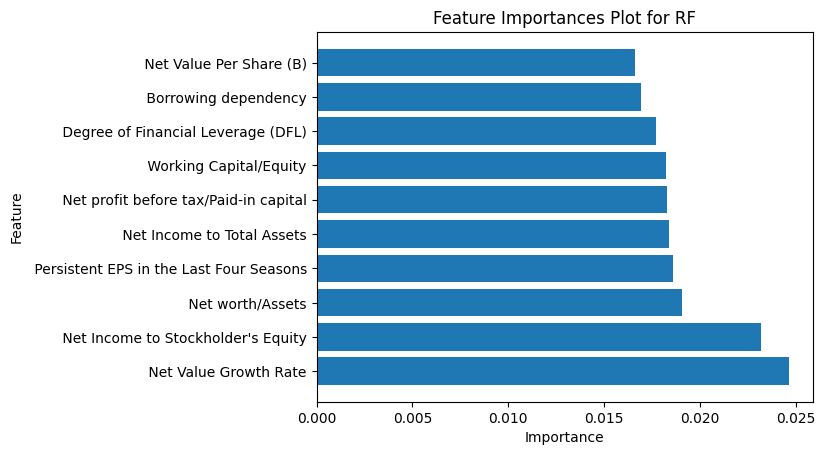

In [13]:
best_model = RandomForestClassifier(random_state=25, n_estimators=100, max_features=5)
best_model.fit(X, y)
df_imp = pd.DataFrame({"feature": X.columns, "importance": best_model.feature_importances_})
df_imp = df_imp.sort_values("importance", ascending=False).iloc[:10]
import matplotlib.pyplot as plt
plt.barh(df_imp["feature"], df_imp["importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances Plot for RF")
plt.show()